<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/HorseAndHumansConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the zip file

In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5 

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 139MB/s]


In [2]:
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 101MB/s]


In [3]:
import os
import zipfile

local_zip = "./horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip ,'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip ,'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

Train Set Directories

In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join("./horse-or-human/horses")

# Directory with our training human pictures
train_human_dir = os.path.join("./horse-or-human/humans")

# Directory with our training horse pictures
validation_train_horse_dir = os.path.join("./validation-horse-or-human/horses")

# Directory with our training human pictures
validation_train_human_dir = os.path.join("./validation-horse-or-human/humans")

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_train_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_train_human_dir)
print(validation_human_names[:10])


['horse42-5.png', 'horse05-7.png', 'horse22-6.png', 'horse39-9.png', 'horse48-4.png', 'horse42-3.png', 'horse45-3.png', 'horse34-5.png', 'horse22-2.png', 'horse42-8.png']
['human12-14.png', 'human14-08.png', 'human13-13.png', 'human02-22.png', 'human12-25.png', 'human15-15.png', 'human02-09.png', 'human06-24.png', 'human17-08.png', 'human01-22.png']
['horse5-565.png', 'horse3-397.png', 'horse5-192.png', 'horse5-235.png', 'horse4-503.png', 'horse4-495.png', 'horse1-335.png', 'horse5-032.png', 'horse4-530.png', 'horse1-276.png']
['valhuman04-19.png', 'valhuman02-14.png', 'valhuman01-00.png', 'valhuman04-01.png', 'valhuman04-23.png', 'valhuman02-22.png', 'valhuman03-02.png', 'valhuman01-14.png', 'valhuman03-16.png', 'valhuman03-09.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_train_horse_dir)))
print('total validation human images:', len(os.listdir(validation_train_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

# Parameters for our graph , we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for interacting over images
pic_index = 0

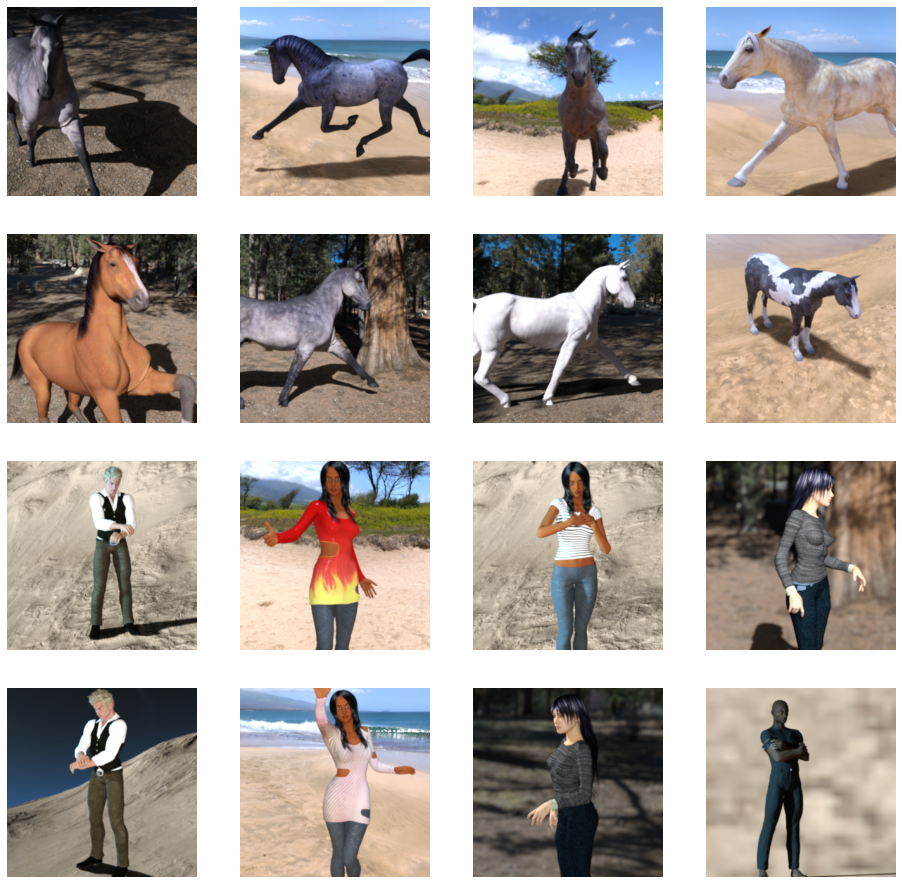

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("/n Reached 90 percent accuracy stopping training now")
      self.model.stop_training = True
MyCallback = myCallback()

In [19]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 64)      

In [21]:
# RMSprop is used instead of adam to enable us adjust our learning rate
# Binary crossentropy is used because it is a binary classifier
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      callbacks = [MyCallback],
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 10s 1s/step - loss: 0.6236 - accuracy: 0.5873 - val_loss: 6.3371 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.5998 - accuracy: 0.7620 - val_loss: 0.8127 - val_accuracy: 0.7734
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.2768 - accuracy: 0.9143 - val_loss: 0.9482 - val_accuracy: 0.8477
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.1731 - accuracy: 0.9422 - val_loss: 0.8392 - val_accuracy: 0.8438
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.3128 - accuracy: 0.8821 - val_loss: 1.1007 - val_accuracy: 0.8203
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.2078 - accuracy: 0.9210 - val_loss: 1.4734 - val_accuracy: 0.8125
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.1121 - accuracy: 0.9600 - val_loss: 1.3136 - val_accuracy: 0.8438


UPLOADING TEST IMAGES FOR PREDICTION

In [24]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')


Saving bey.jpg to bey (1).jpg
[1.]
bey.jpg is a human


Visualizing Intermediate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


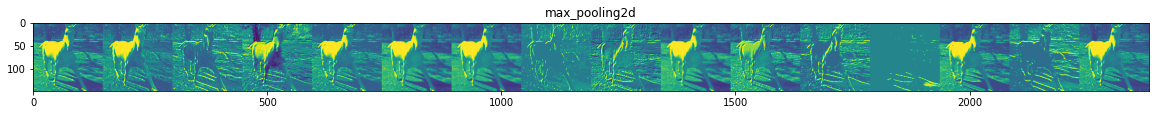

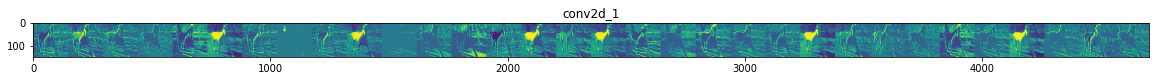

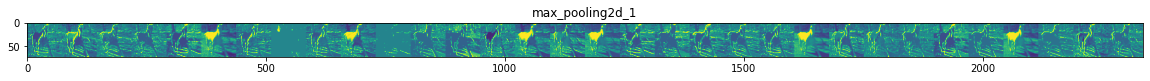

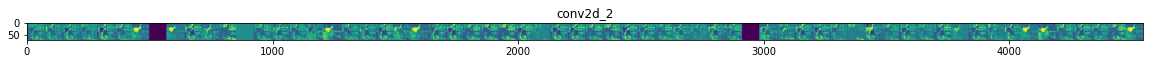

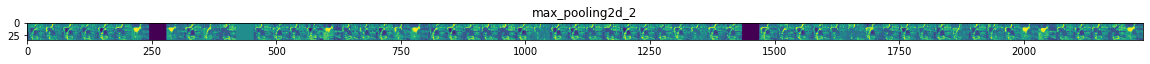

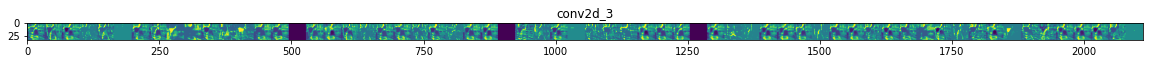

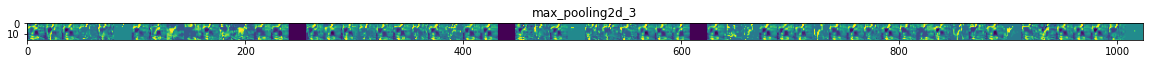

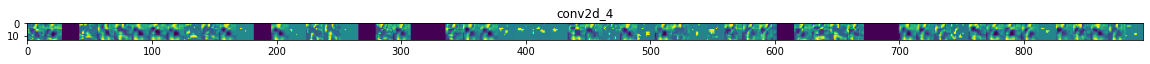

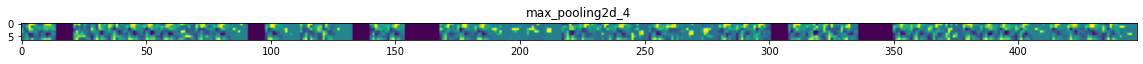

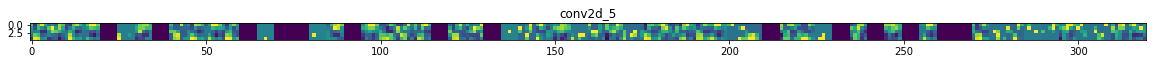

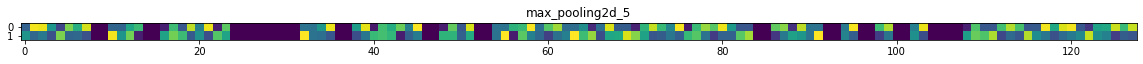

In [17]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')